in [`gmx editconf`](https://manual.gromacs.org/current/onlinehelp/gmx-editconf.html) command<br>
`-d` arg determined the Distance between the solute and the box<br>
we want fix the system atom number by adjust the `-d` value<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
pdbid = "2jpz_EWV"

In [3]:
def get_n_sol(d):
    !cp topol.top.bak1 topol.top
    !gmx editconf -f {pdbid}.gro.pdb -o {pdbid}_dode.pdb -c yes -d {d} -bt dodecahedron > /dev/null 2>&1
    !gmx solvate -cp {pdbid}_dode.pdb -cs spc216.gro -o {pdbid}_solv.pdb -p topol.top > /dev/null 2>&1
    sol = !grep "SOL" topol.top
    n_sol = int(sol[0].split()[1])
    return n_sol

In [4]:
def get_box(d):
    !cp topol.top.bak1 topol.top
    !gmx editconf -f {pdbid}.gro.pdb -o {pdbid}_dode.pdb -c yes -d {d} -bt dodecahedron >editconf.txt 2>&1
    volume = !grep "new box volume" editconf.txt
    volume = float(volume[0].split()[4])
    return volume

In [5]:
def get_n_atoms(d):
    !cp topol.top.bak1 topol.top
    !gmx editconf -f {pdbid}.gro.pdb -o {pdbid}_dode.pdb -c yes -d {d} -bt dodecahedron > /dev/null 2>&1
    !gmx solvate -cp {pdbid}_dode.pdb -cs spc216.gro -o {pdbid}_solv.pdb -p topol.top >solvate.txt 2>&1
    atoms = !grep "Solvent box contains" solvate.txt
    n_atoms = int(atoms[0].split()[3])
    return n_atoms

### Plot d v.s. Volume (linear)

In [6]:
!rm \#topol.top* \#{pdbid}*
d2volume = {}
for d in tqdm(np.linspace(1.26, 1.29, 51)):
    volume = get_box(d)
    d2volume[np.round(d, decimals=15)] = volume

100%|███████████████████████████████████████████| 51/51 [00:27<00:00,  1.88it/s]


Text(0, 0.5, 'volume')

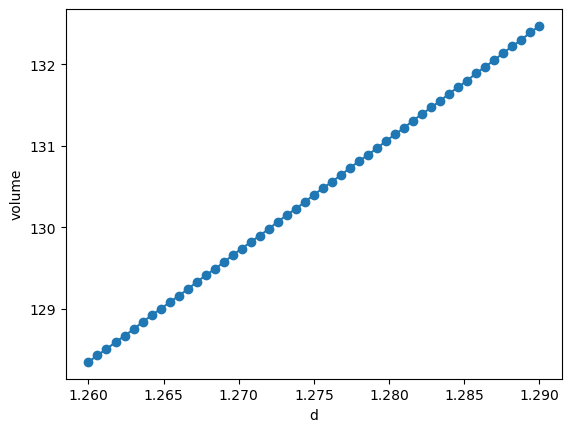

In [7]:
plt.plot(d2volume.keys(), d2volume.values())
plt.scatter(d2volume.keys(), d2volume.values())
plt.xlabel('d')
plt.ylabel('volume')

### Plot d v.s. n_sol (non-linear)
in wtTel22, we want fix n_sol = **3839**

In [21]:
!rm \#topol.top* \#{pdbid}*
d2n_sol = {}
for d in tqdm(np.linspace(1.248, 1.255, 81)):
    n_sol = get_n_sol(d)
    d2n_sol[np.round(d, decimals=15)] = n_sol

100%|███████████████████████████████████████████| 81/81 [01:09<00:00,  1.17it/s]


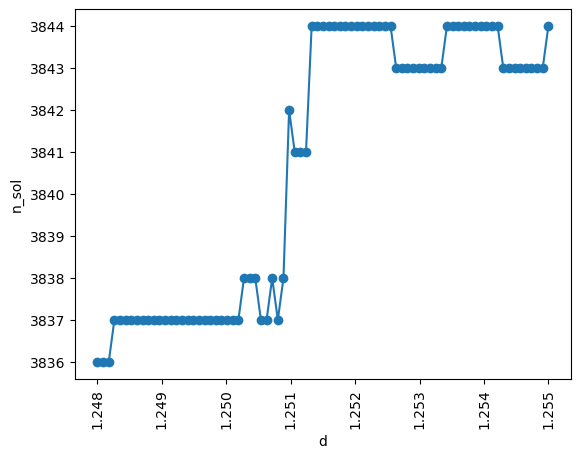

In [22]:
plt.plot(d2n_sol.keys(), d2n_sol.values())
plt.scatter(d2n_sol.keys(), d2n_sol.values())
plt.xlabel('d')
plt.ylabel('n_sol')
plt.xticks(rotation=90)
plt.show()

In [19]:
d2n_sol

{1.25: 3837,
 1.2501: 3837,
 1.2502: 3837,
 1.2503: 3838,
 1.2504: 3838,
 1.2505: 3837,
 1.2506: 3837,
 1.2507: 3837,
 1.2508: 3837,
 1.2509: 3838,
 1.251: 3842,
 1.2511: 3841,
 1.2512: 3841,
 1.2513: 3843,
 1.2514: 3844,
 1.2515: 3844,
 1.2516: 3844,
 1.2517: 3844,
 1.2518: 3844,
 1.2519: 3844,
 1.252: 3844,
 1.2521: 3844,
 1.2522: 3844,
 1.2523: 3844,
 1.2524: 3844,
 1.2525: 3844,
 1.2526: 3843,
 1.2527: 3843,
 1.2528: 3843,
 1.2529: 3843,
 1.253: 3843,
 1.2531: 3843,
 1.2532: 3843,
 1.2533: 3843,
 1.2534: 3843,
 1.2535: 3844,
 1.2536: 3844,
 1.2537: 3844,
 1.2538: 3844,
 1.2539: 3844,
 1.254: 3844,
 1.2541: 3844,
 1.2542: 3844,
 1.2543: 3843,
 1.2544: 3843,
 1.2545: 3843,
 1.2546: 3843,
 1.2547: 3843,
 1.2548: 3843,
 1.2549: 3843,
 1.255: 3844}